<a href="https://colab.research.google.com/github/CuteLoop/MCD-Propedeutico/blob/tarea/Programaci%C3%B3n/Tarea_indice/IndiceDeMarginalizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice de marginalización en municios Mexicanos


## Introducción

El Consejo Nacional de Población (CONAPO) del gobierno mexicano, realiza cada 5 años un análisis sobre un estudio multidimensional de la pobreza y establece un índice de marginación.

En este trabajo se hace un análisis de la pobreza en México utilizando los datos proporcionados por el gobierno Mexicano en esta [página](https://www.gob.mx/conapo/documentos/indices-de-marginacion-2020-284372) a través de la CONAPO y puden ser descargados en este [enlace](http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls)




In [244]:
# Correr esta celda y subir archivo con los datos

from google.colab import files
uploaded = files.upload()

Saving IMM_2020.csv to IMM_2020 (4).csv


In [245]:
import io
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(io.BytesIO(uploaded['IMM_2020.csv']), header =3)
df = pd.read_csv(io.BytesIO(uploaded['IMM_2020.csv']), header =5)

print("Con esta tabla podremos identificar facilmente que tipo de datos contiene cada columna")
data.head(2)

data.columns

Con esta tabla podremos identificar facilmente que tipo de datos contiene cada columna


Index(['Clave de la entidad federativa', 'Nombre de la entidad',
       'Clave del municipio', 'Nombre del municipio', 'Población total',
       '% Población de 15 años o más analfabeta ',
       '% Población  de 15 años o más sin educación básica',
       '% Ocupantes en viviendas particulares sin drenaje ni excusado',
       '% Ocupantes en viviendas particulares sin energía eléctrica',
       '% Ocupantes en viviendas particulares sin agua entubada',
       '% Ocupantes en viviendas particulares con piso de tierra',
       '% Viviendas particulares con hacinamiento',
       '% Población en localidades con menos de 5 000 habitantes',
       '% Población ocupada con ingresos menores a 2 salarios mínimos',
       'Índice de marginación, 2020', 'Grado de marginación, 2020',
       'Índice de marginación normalizado, 2020',
       'Lugar que ocupa en el contexto nacional'],
      dtype='object')

In [246]:

df = df.drop(labels=0, axis=0)
df.head()



,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,Unnamed: 17
1,Nacional,NaN,NaN,NaN,126 014 024,4.75,29.71,1.47,0.66,3.67,3.81,19.73,27.00,66.88,—,—,—,—
2,01,Aguascalientes,1001.0,Aguascalientes,948 990,1.64,20.37,0.10,0.11,0.38,0.59,10.34,7.52,54.23,60.319,Muy bajo,0.94,2 435
3,01,Aguascalientes,1002.0,Asientos,51 536,3.53,33.91,2.65,0.49,0.86,1.35,22.94,78.22,78.57,56.546,Muy bajo,0.89,1 816
4,01,Aguascalientes,1003.0,Calvillo,58 250,4.49,42.48,0.37,0.52,0.80,1.04,19.22,51.30,79.26,57.058,Muy bajo,0.89,1 932
5,01,Aguascalientes,1004.0,Cosío,17 000,3.14,27.70,0.71,0.58,0.66,1.03,22.72,65.47,81.73,57.114,Muy bajo,0.89,1 948


In [247]:
df.tail()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,Unnamed: 17
2468,32,Zacatecas,32056.0,Zacatecas,149 607,1.44,19.44,0.29,0.16,1.28,0.48,9.34,7.46,57.89,60.176,Muy bajo,0.94,2 431
2469,32,Zacatecas,32057.0,Trancoso,20 455,5.12,31.99,3.07,0.50,2.86,1.34,23.54,16.79,83.06,56.958,Muy bajo,0.89,1 908
2470,32,Zacatecas,32058.0,Santa María de la Paz,2 767,5.63,44.23,1.09,0.47,0.51,1.67,17.95,100.00,79.01,56.056,Bajo,0.88,1 668
2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2472,Fuente: Estimaciones del CONAPO con base en el...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
total_mex = df.loc[1]
print(total_mex)

CVE_ENT           Nacional
NOM_ENT                NaN
CVE_MUN                NaN
NOM_MUN                NaN
POB_TOT        126 014 024
ANALF                 4.75
SBASC                29.71
OVSDE                 1.47
OVSEE                 0.66
OVSAE                 3.67
OVPT                  3.81
VHAC                 19.73
PL.5000               27.0
PO2SM                66.88
IM_2020                  —
GM_2020                  —
IMN_2020                 —
Unnamed: 17              —
Name: 1, dtype: object


In [249]:
df = df.drop(labels=[ 1,2471, 2472], axis=0)
df.rename(columns={"Unnamed: 17": "LugarNacional"}, inplace = True)

df.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,LugarNacional
2,01,Aguascalientes,1001.0,Aguascalientes,948 990,1.64,20.37,0.10,0.11,0.38,0.59,10.34,7.52,54.23,60.319,Muy bajo,0.94,2 435
3,01,Aguascalientes,1002.0,Asientos,51 536,3.53,33.91,2.65,0.49,0.86,1.35,22.94,78.22,78.57,56.546,Muy bajo,0.89,1 816
4,01,Aguascalientes,1003.0,Calvillo,58 250,4.49,42.48,0.37,0.52,0.80,1.04,19.22,51.30,79.26,57.058,Muy bajo,0.89,1 932
5,01,Aguascalientes,1004.0,Cosío,17 000,3.14,27.70,0.71,0.58,0.66,1.03,22.72,65.47,81.73,57.114,Muy bajo,0.89,1 948
6,01,Aguascalientes,1005.0,Jesús María,129 929,2.38,26.69,0.28,0.35,0.86,1.31,16.40,37.16,56.75,59.012,Muy bajo,0.92,2 323


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 2 to 2470
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CVE_ENT        2469 non-null   object 
 1   NOM_ENT        2469 non-null   object 
 2   CVE_MUN        2469 non-null   float64
 3   NOM_MUN        2469 non-null   object 
 4   POB_TOT        2469 non-null   object 
 5   ANALF          2469 non-null   float64
 6   SBASC          2469 non-null   float64
 7   OVSDE          2469 non-null   float64
 8   OVSEE          2469 non-null   float64
 9   OVSAE          2469 non-null   float64
 10  OVPT           2469 non-null   float64
 11  VHAC           2469 non-null   float64
 12  PL.5000        2469 non-null   float64
 13  PO2SM          2469 non-null   float64
 14  IM_2020        2469 non-null   object 
 15  GM_2020        2469 non-null   object 
 16  IMN_2020       2469 non-null   object 
 17  LugarNacional  2469 non-null   object 
dtypes: float

In [251]:
df.describe()

,CVE_MUN,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM
count,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19324.164844,10.164585,45.853094,3.160041,1.500721,6.118052,7.987254,26.566290,69.900401,82.143913
std,7382.892458,7.633688,13.981635,5.289313,2.769215,9.246006,8.973603,10.586603,35.267734,11.830457
min,1001.000000,0.350000,5.540000,0.000000,0.000000,0.000000,0.000000,3.950000,0.000000,28.450000
25%,14079.000000,4.430000,35.740000,0.650000,0.370000,0.880000,1.650000,18.730000,40.130000,74.620000
50%,20226.000000,8.200000,46.340000,1.430000,0.830000,2.450000,4.710000,25.000000,100.000000,84.640000
75%,24027.000000,13.790000,55.860000,3.340000,1.680000,7.290000,11.030000,32.820000,100.000000,91.620000
max,32058.000000,53.070000,88.330000,64.450000,53.070000,81.790000,68.150000,69.560000,100.000000,100.000000


### Resumen de limpieza y exploración de datos 

####Como los datos vienen de un excel.
- Designamos el renglon con nombres de las columnas
- Quitamos un par de renglones con datos nulos.
- Tras esto las 18 columnas tienen valores no nulos.
- Vemos que no todas las columnas que contienen números, se cargaron con tipos numéricos, como con la columna de población total.

In [252]:
#Convertimos los datos restantes a datos numèricos
df.IM_2020 = df.IM_2020.astype("float64")
df.IMN_2020 = df.IMN_2020.astype("float64")




In [253]:
df.LugarNacional = df.LugarNacional.str.replace(" ", "").astype("int64")
df.POB_TOT = df.POB_TOT.str.replace(" ", "").astype("int64")

#### Tras verificar que todos los datos numéricos son tratados como números. Podemos comenzar con la exploración estadística básica.

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 2 to 2470
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CVE_ENT        2469 non-null   object 
 1   NOM_ENT        2469 non-null   object 
 2   CVE_MUN        2469 non-null   float64
 3   NOM_MUN        2469 non-null   object 
 4   POB_TOT        2469 non-null   int64  
 5   ANALF          2469 non-null   float64
 6   SBASC          2469 non-null   float64
 7   OVSDE          2469 non-null   float64
 8   OVSEE          2469 non-null   float64
 9   OVSAE          2469 non-null   float64
 10  OVPT           2469 non-null   float64
 11  VHAC           2469 non-null   float64
 12  PL.5000        2469 non-null   float64
 13  PO2SM          2469 non-null   float64
 14  IM_2020        2469 non-null   float64
 15  GM_2020        2469 non-null   object 
 16  IMN_2020       2469 non-null   float64
 17  LugarNacional  2469 non-null   int64  
dtypes: float

In [255]:
df.describe()

,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020,LugarNacional
count,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.00000
mean,19324.164844,5.103849e+04,10.164585,45.853094,3.160041,1.500721,6.118052,7.987254,26.566290,69.900401,82.143913,53.955581,0.844897,1235.00000
std,7382.892458,1.469907e+05,7.633688,13.981635,5.289313,2.769215,9.246006,8.973603,10.586603,35.267734,11.830457,3.904591,0.061259,712.88323
min,1001.000000,8.100000e+01,0.350000,5.540000,0.000000,0.000000,0.000000,0.000000,3.950000,0.000000,28.450000,21.407000,0.340000,1.00000
25%,14079.000000,4.489000e+03,4.430000,35.740000,0.650000,0.370000,0.880000,1.650000,18.730000,40.130000,74.620000,51.844000,0.810000,618.00000
50%,20226.000000,1.355200e+04,8.200000,46.340000,1.430000,0.830000,2.450000,4.710000,25.000000,100.000000,84.640000,54.424000,0.850000,1235.00000
75%,24027.000000,3.528400e+04,13.790000,55.860000,3.340000,1.680000,7.290000,11.030000,32.820000,100.000000,91.620000,56.696000,0.890000,1852.00000
max,32058.000000,1.922523e+06,53.070000,88.330000,64.450000,53.070000,81.790000,68.150000,69.560000,100.000000,100.000000,62.397000,0.980000,2469.00000


<Axes: >

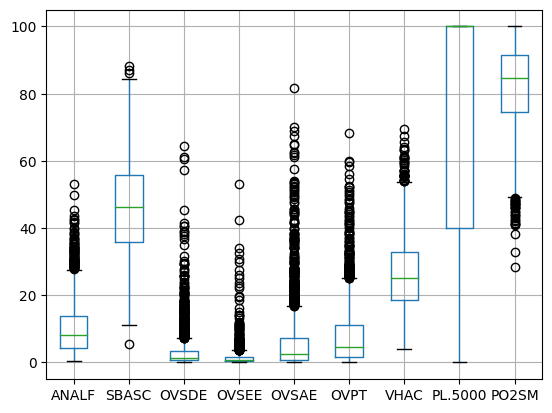

In [256]:
df.boxplot(column= ['ANALF', 'SBASC',
       'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM'])

In [257]:
data.columns

Index(['Clave de la entidad federativa', 'Nombre de la entidad',
       'Clave del municipio', 'Nombre del municipio', 'Población total',
       '% Población de 15 años o más analfabeta ',
       '% Población  de 15 años o más sin educación básica',
       '% Ocupantes en viviendas particulares sin drenaje ni excusado',
       '% Ocupantes en viviendas particulares sin energía eléctrica',
       '% Ocupantes en viviendas particulares sin agua entubada',
       '% Ocupantes en viviendas particulares con piso de tierra',
       '% Viviendas particulares con hacinamiento',
       '% Población en localidades con menos de 5 000 habitantes',
       '% Población ocupada con ingresos menores a 2 salarios mínimos',
       'Índice de marginación, 2020', 'Grado de marginación, 2020',
       'Índice de marginación normalizado, 2020',
       'Lugar que ocupa en el contexto nacional'],
      dtype='object')

In [258]:
#Calculo de la población de cada estado

grupos_estados = df.groupby("NOM_ENT").POB_TOT.sum()
grupos_estados

NOM_ENT
Aguascalientes                      1425607
Baja California                     3769020
Baja California Sur                  798447
Campeche                             928363
Chiapas                             5543828
Chihuahua                           3741869
Ciudad de México                    9209944
Coahuila de Zaragoza                3146771
Colima                               731391
Durango                             1832650
Guanajuato                          6166934
Guerrero                            3540685
Hidalgo                             3082841
Jalisco                             8348151
Michoacán de Ocampo                 4748846
Morelos                             1971520
México                             16992418
Nayarit                             1235456
Nuevo León                          5784442
Oaxaca                              4132148
Puebla                              6583278
Querétaro                           2368467
Quintana Roo            

In [259]:
grupos_estados.info()

<class 'pandas.core.series.Series'>
Index: 32 entries, Aguascalientes to Zacatecas
Series name: POB_TOT
Non-Null Count  Dtype
--------------  -----
32 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


In [260]:
"""" Para hacer una Gráfica con el  porcentaje de municipios por estado con índices de marginación
 "muy bajo", "bajo", "medio", "alto" y "muy alto" """


# Agrupamos por índice de marginalización y contamos número de municipios con dicho índice
grupos_estados = df.groupby(["NOM_ENT","GM_2020"]).POB_TOT.count()
grupos_estados

NOM_ENT              GM_2020 
Aguascalientes       Muy bajo    11
Baja California      Medio        1
                     Muy bajo     5
Baja California Sur  Muy bajo     5
Campeche             Alto         2
                                 ..
Yucatán              Muy bajo     7
Zacatecas            Alto         2
                     Bajo        28
                     Medio        5
                     Muy bajo    23
Name: POB_TOT, Length: 123, dtype: int64

<Axes: title={'center': 'Sonora'}>

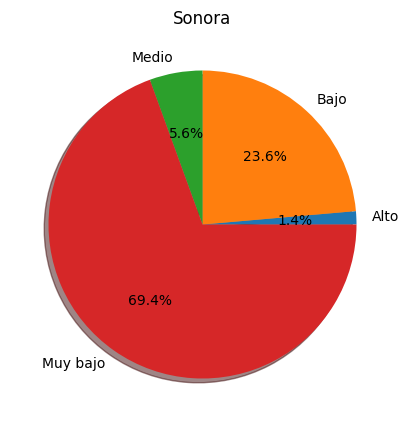

In [272]:

# Con esta info podemos hacer Una gráfica que ilustre la distribución de índices por estado

df_estados = grupos_estados["Sonora"]

df_estados.plot.pie(figsize=(5, 5),title ='Sonora',ylabel='',autopct='%1.1f%%', \
                   shadow=True, startangle=0)

In [262]:
grupos_estados['Sonora'].groupby(["GM_2020"]).count()

GM_2020
Alto        1
Bajo        1
Medio       1
Muy bajo    1
Name: POB_TOT, dtype: int64

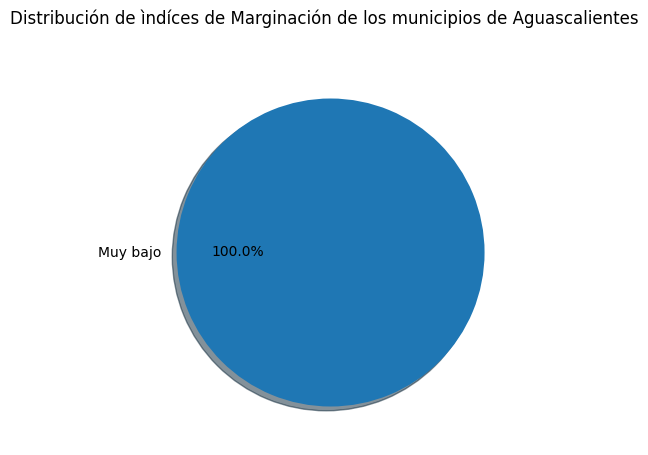

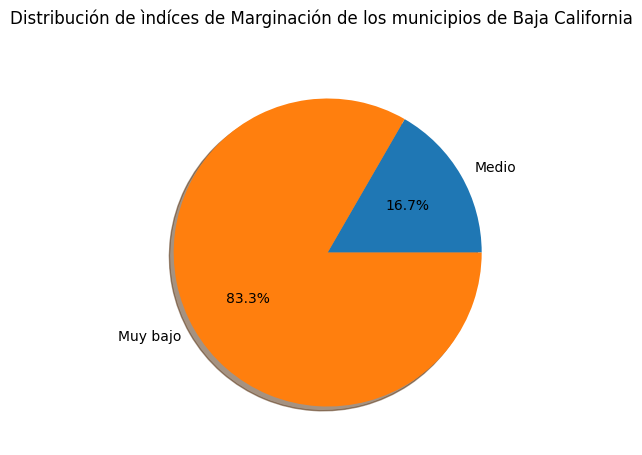

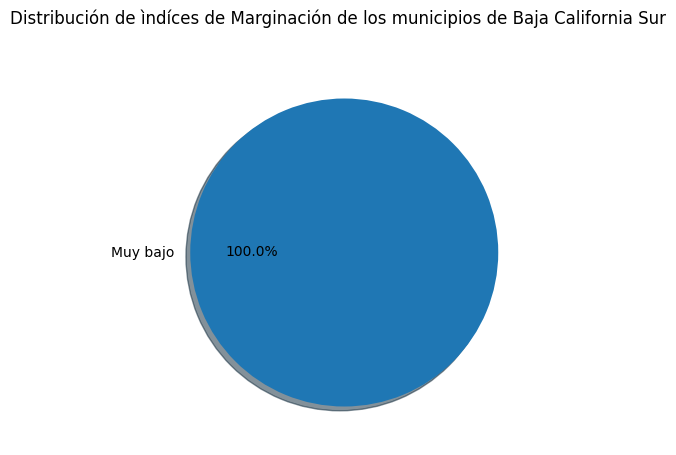

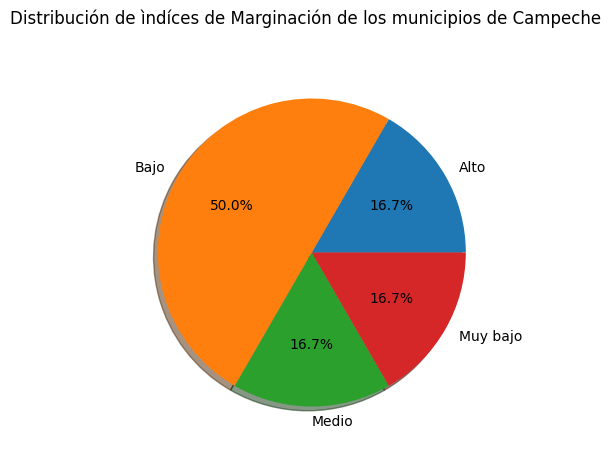

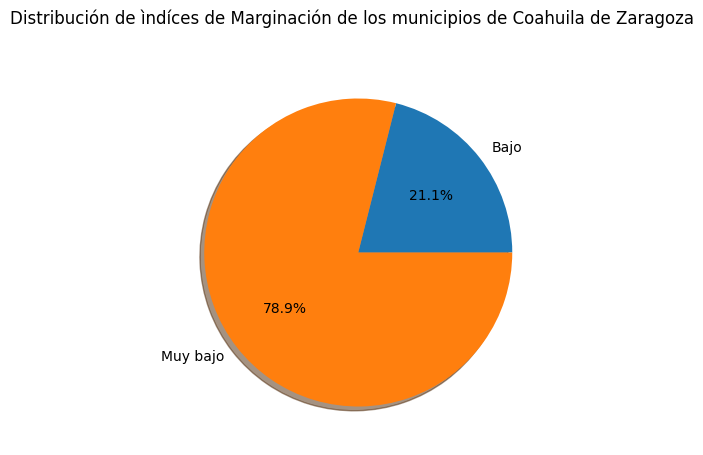

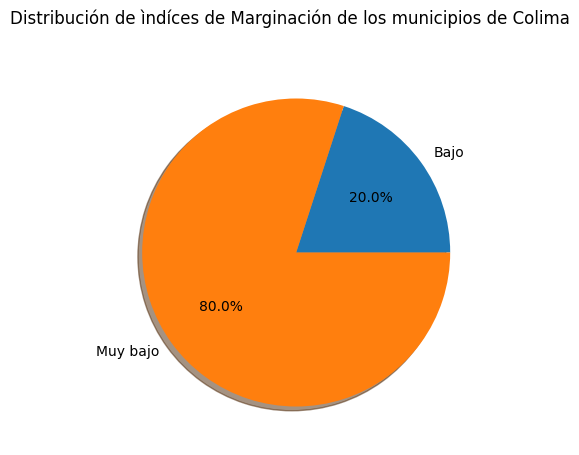

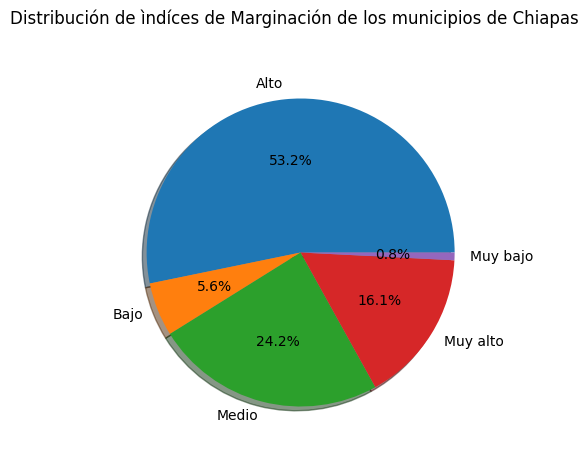

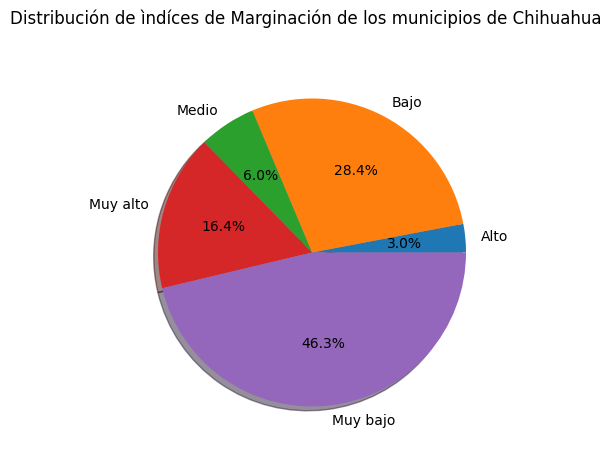

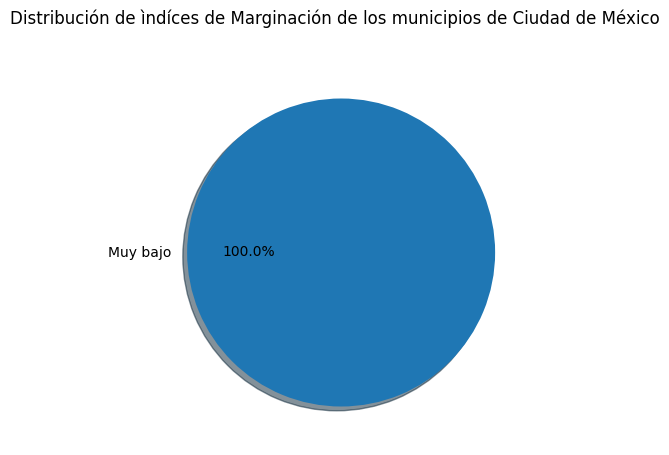

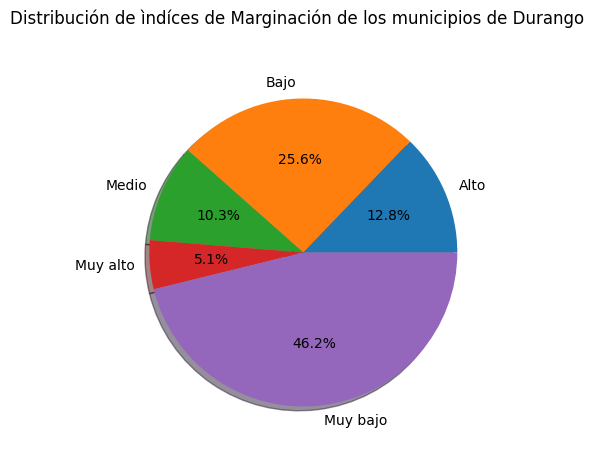

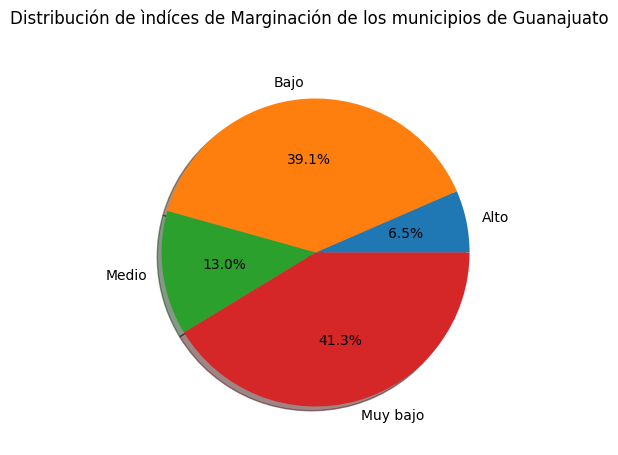

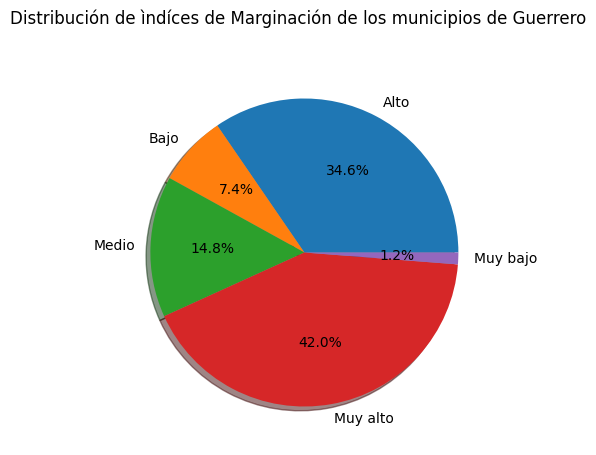

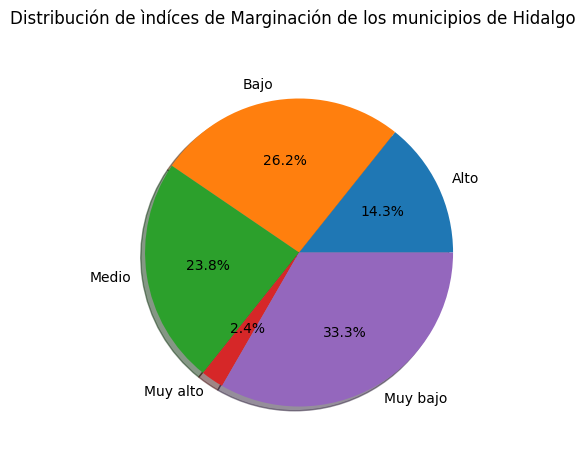

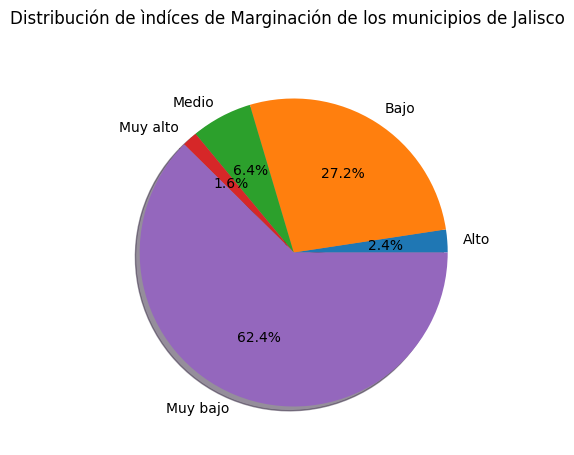

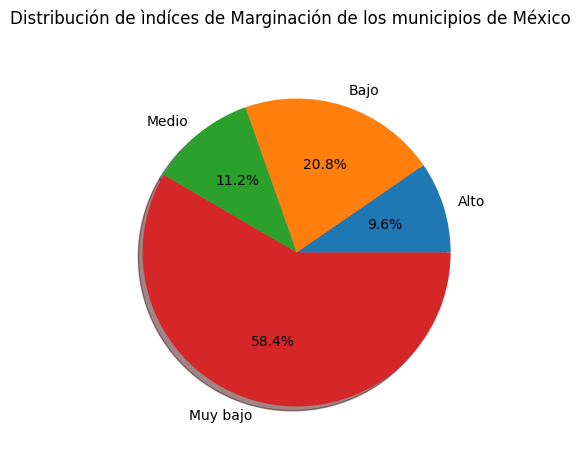

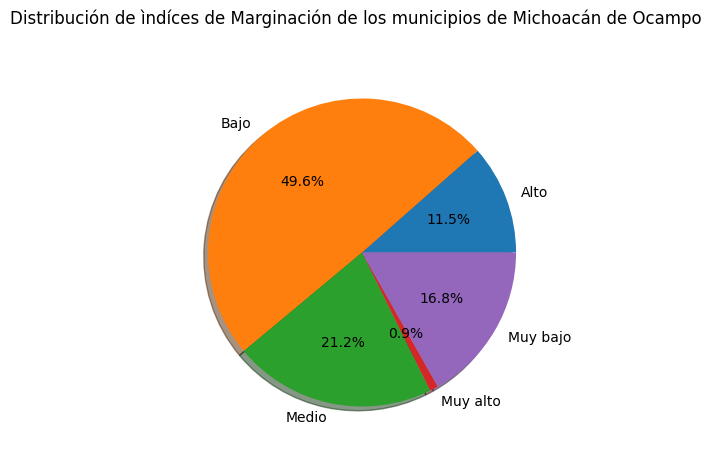

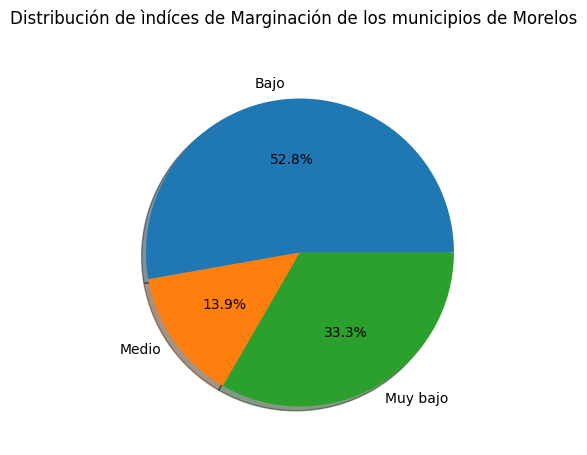

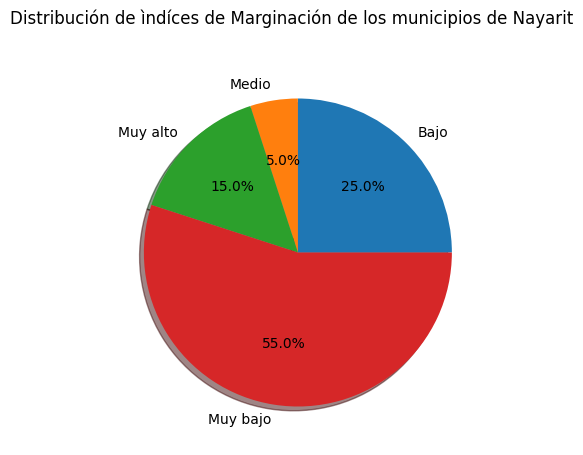

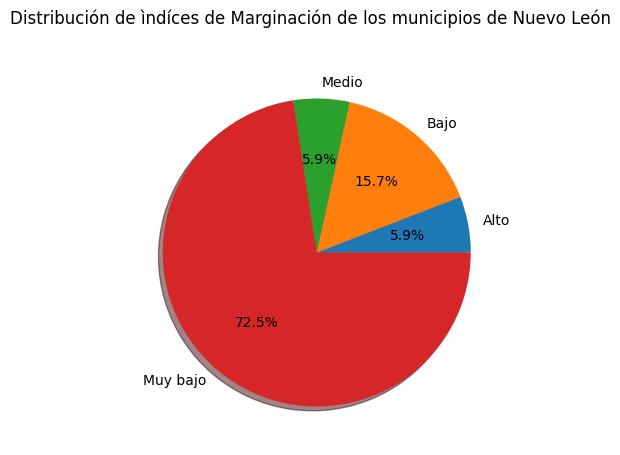

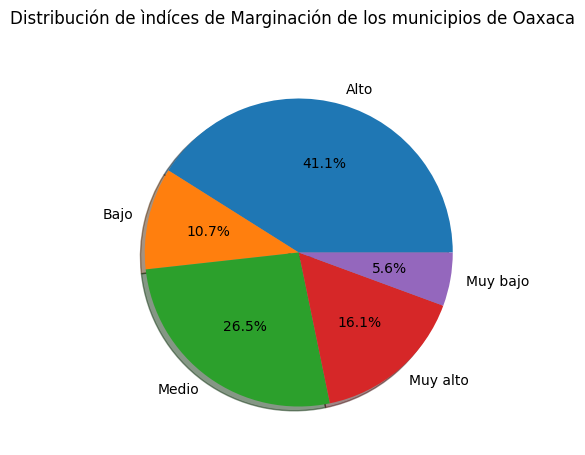

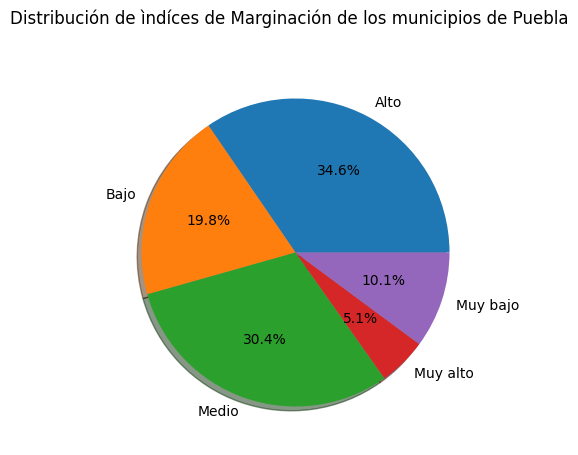

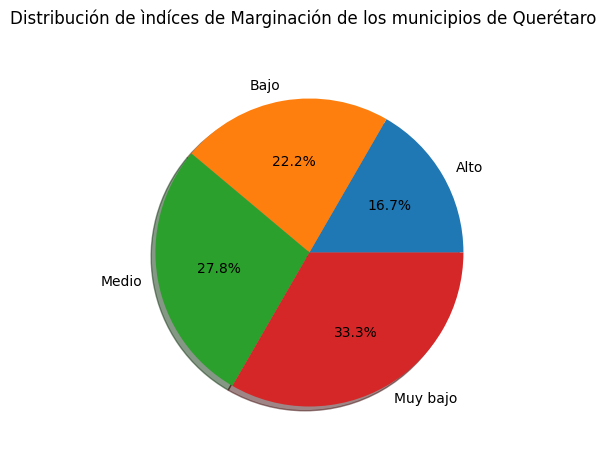

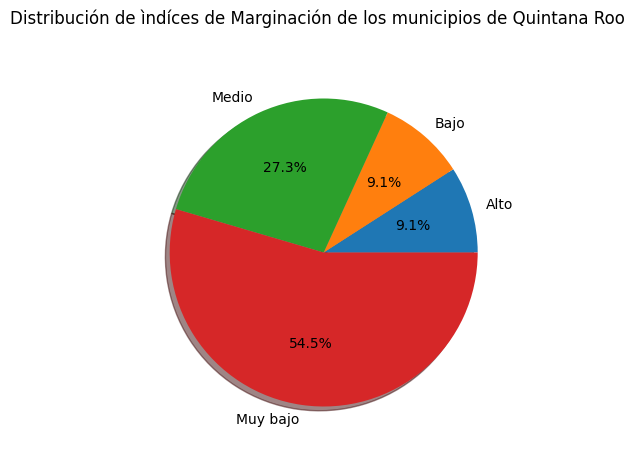

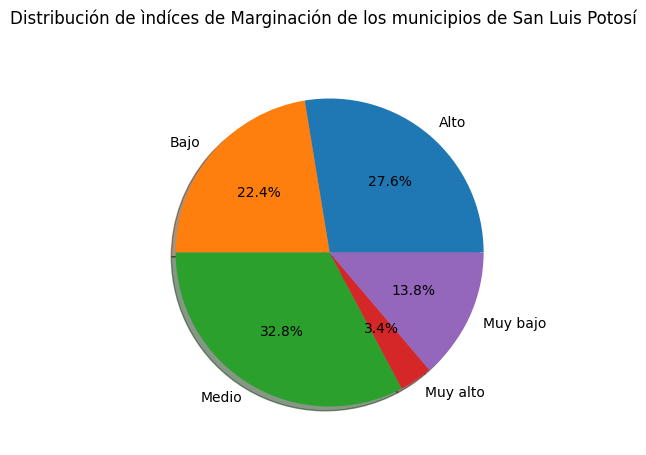

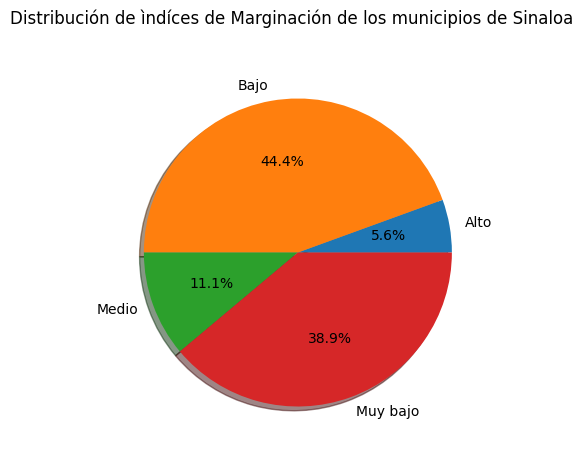

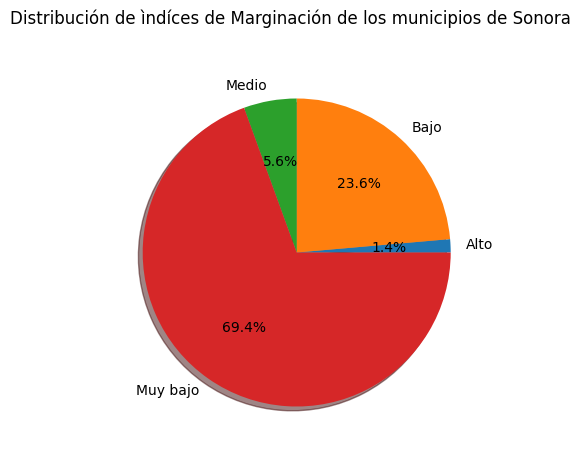

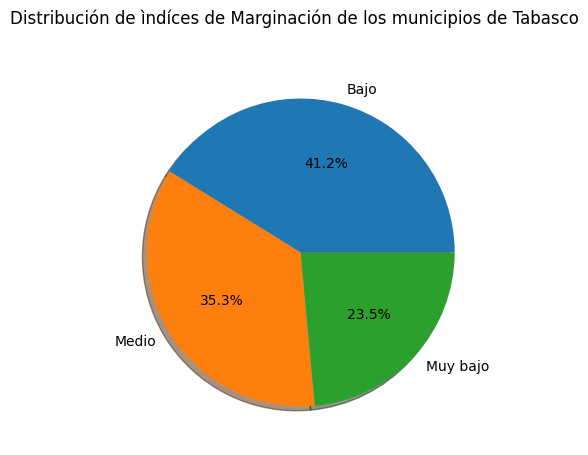

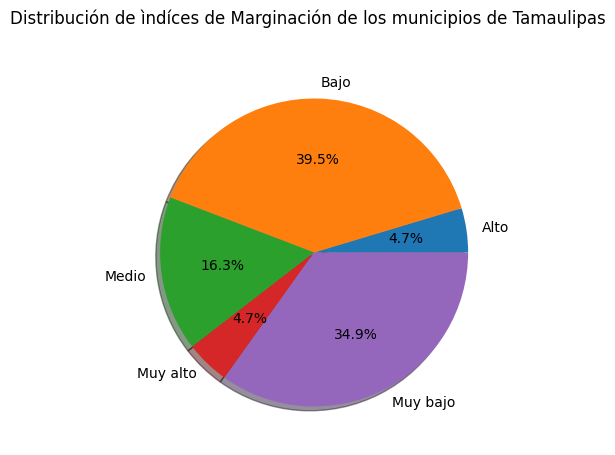

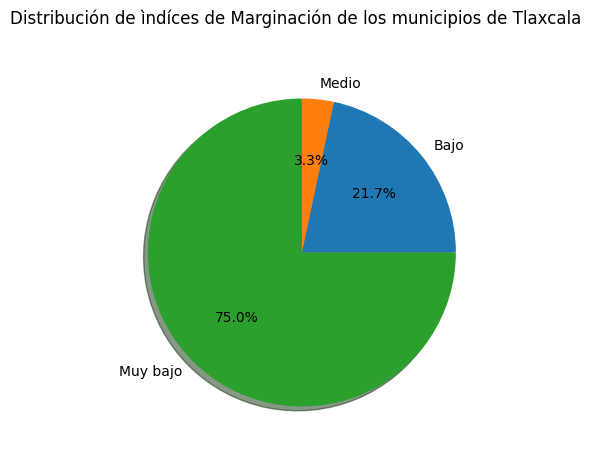

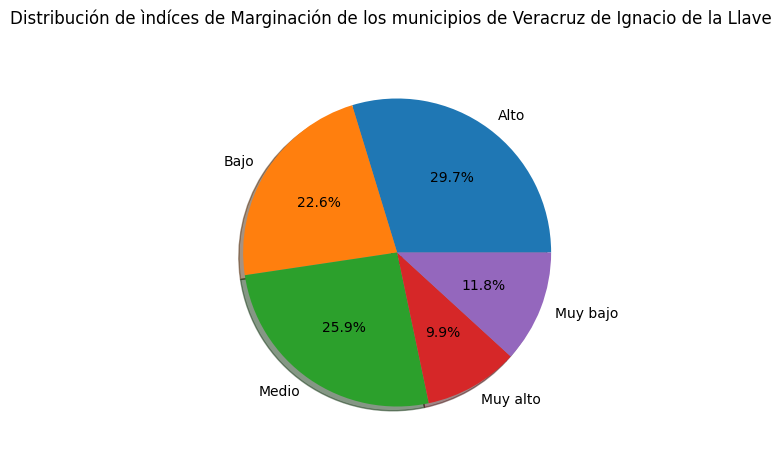

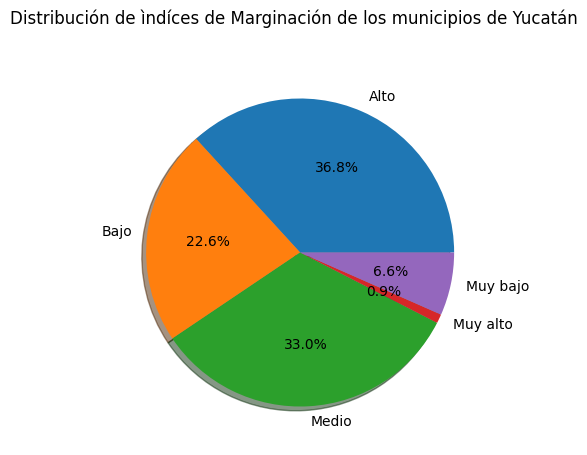

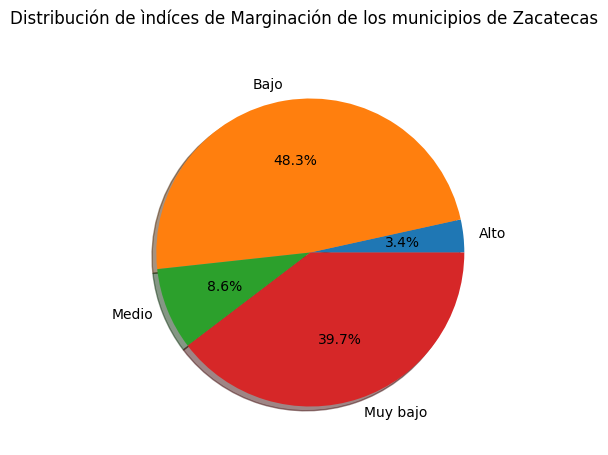

In [275]:
estados = df.NOM_ENT.unique()

for estado in estados:
  titulo="Distribución de ìndíces de Marginación de los municipios de {}".format(estado)
  df_estados = grupos_estados[estado]
  df_estados.plot.pie(subplots=True, figsize=(5, 5),title=titulo, ylabel='',autopct='%1.1f%%', \
                   shadow=True, startangle=0)
  
  plt.savefig('distribucion_municipios_{}.png'.format(estado))

  plt.show()



In [278]:
poblacio_estado = df.groupby(["NOM_ENT"]).POB_TOT.sum()
poblacio_estado

NOM_ENT
Aguascalientes                      1425607
Baja California                     3769020
Baja California Sur                  798447
Campeche                             928363
Chiapas                             5543828
Chihuahua                           3741869
Ciudad de México                    9209944
Coahuila de Zaragoza                3146771
Colima                               731391
Durango                             1832650
Guanajuato                          6166934
Guerrero                            3540685
Hidalgo                             3082841
Jalisco                             8348151
Michoacán de Ocampo                 4748846
Morelos                             1971520
México                             16992418
Nayarit                             1235456
Nuevo León                          5784442
Oaxaca                              4132148
Puebla                              6583278
Querétaro                           2368467
Quintana Roo            

In [279]:
poblacio_estado_indice = df.groupby(["NOM_ENT","GM_2020"]).POB_TOT.sum()
poblacio_estado_indice

NOM_ENT              GM_2020 
Aguascalientes       Muy bajo    1425607
Baja California      Medio        117568
                     Muy bajo    3651452
Baja California Sur  Muy bajo     798447
Campeche             Alto          78627
                                  ...   
Yucatán              Muy bajo    1315659
Zacatecas            Alto           6974
                     Bajo         346924
                     Medio        102284
                     Muy bajo    1165956
Name: POB_TOT, Length: 123, dtype: int64

In [281]:
poblacio_estado_indice["Sonora"]

GM_2020
Alto           3090
Bajo         203060
Medio         45328
Muy bajo    2693362
Name: POB_TOT, dtype: int64

<Axes: title={'center': 'Sonora'}>

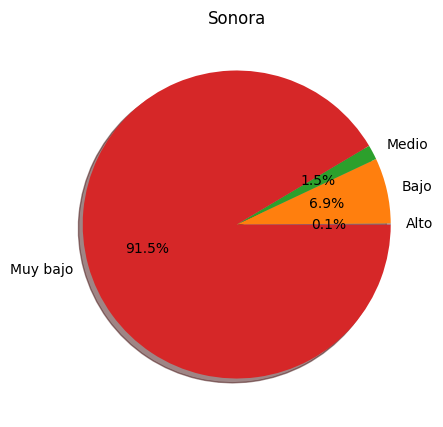

In [280]:

df_estados_pob = poblacio_estado_indice["Sonora"]

df_estados_pob.plot.pie(figsize=(5, 5),title ='Sonora',ylabel='',autopct='%1.1f%%', \
                   shadow=True, startangle=0)

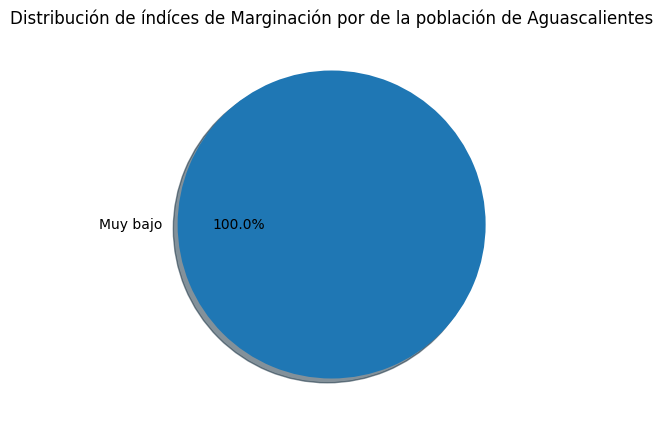

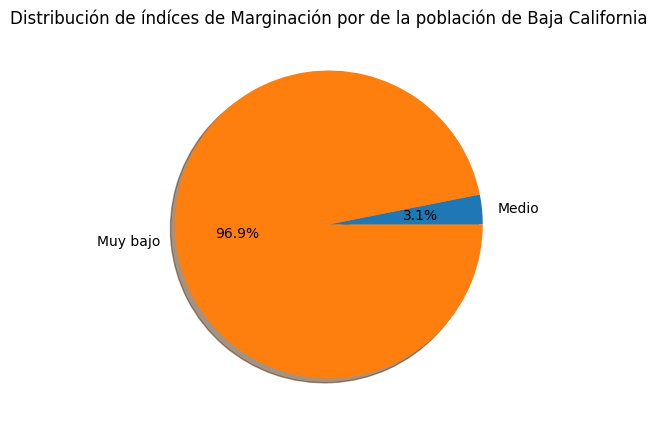

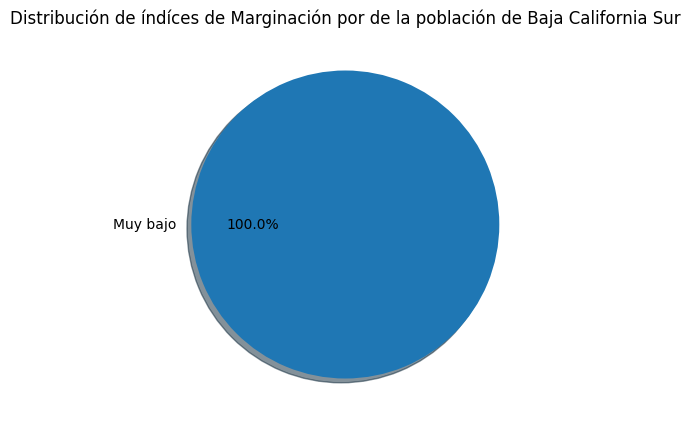

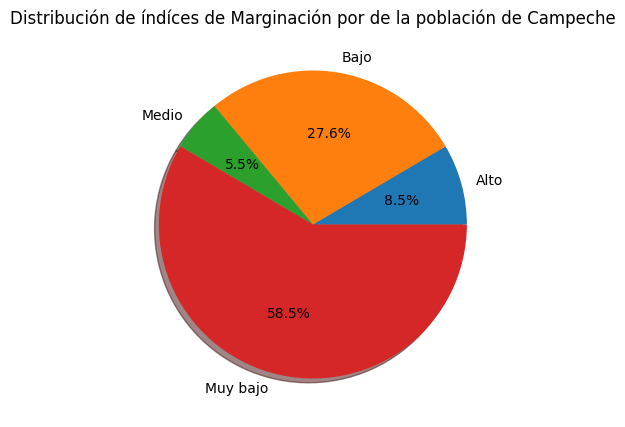

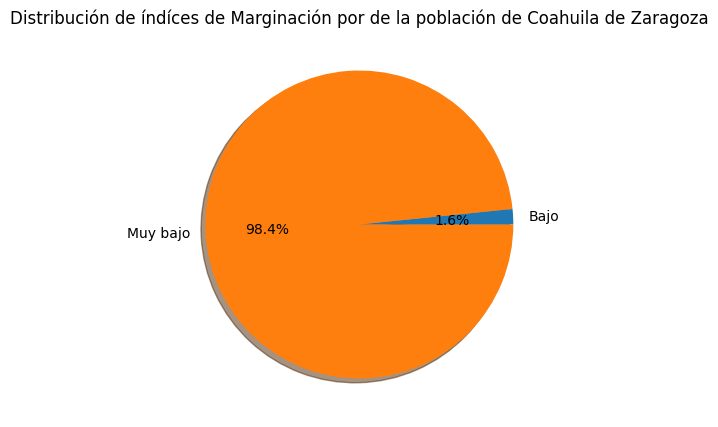

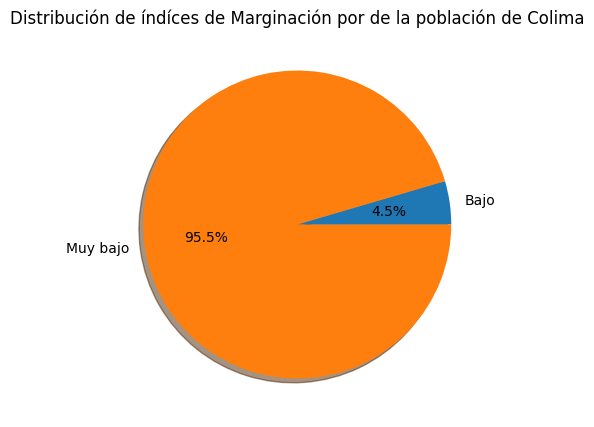

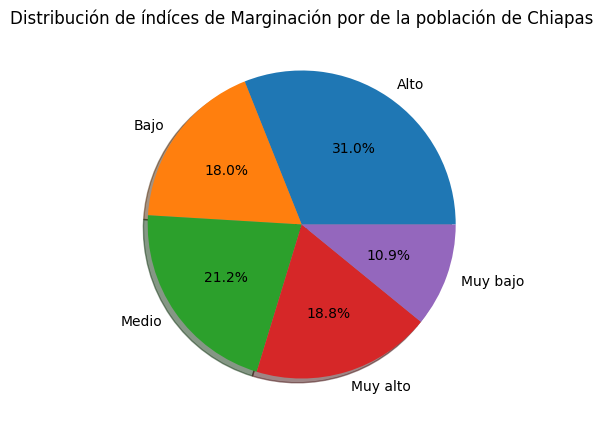

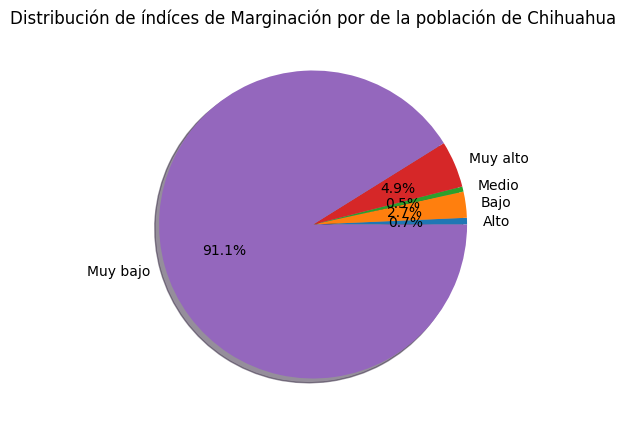

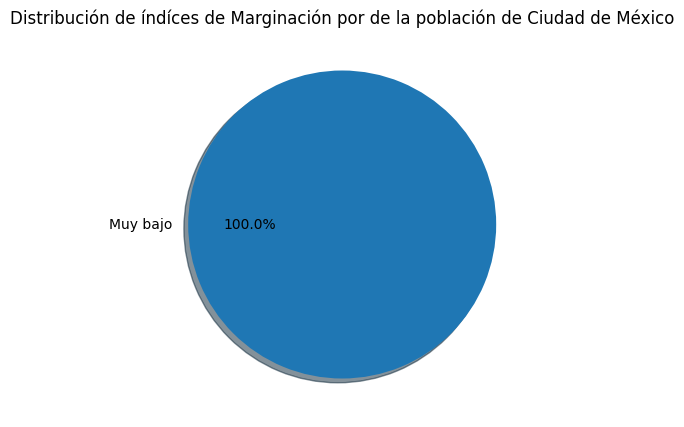

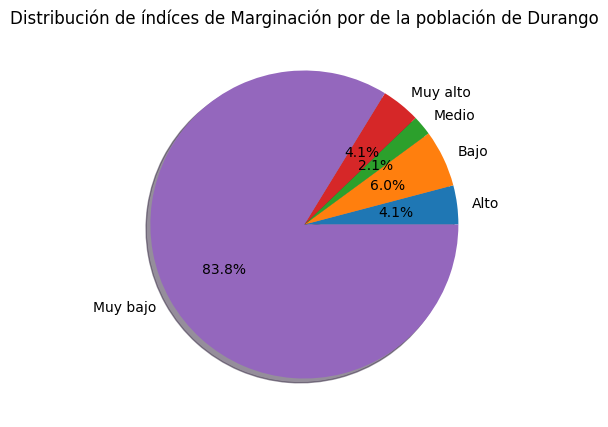

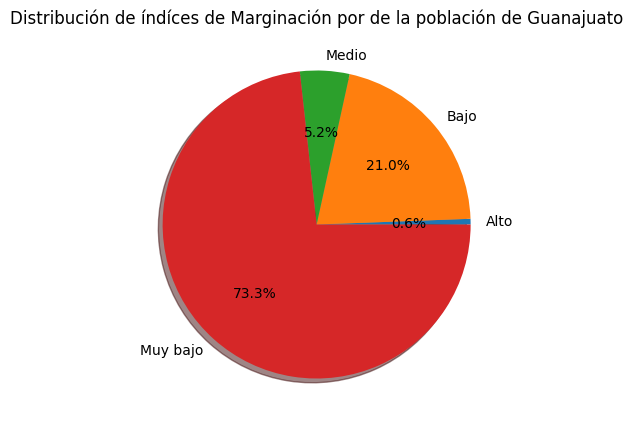

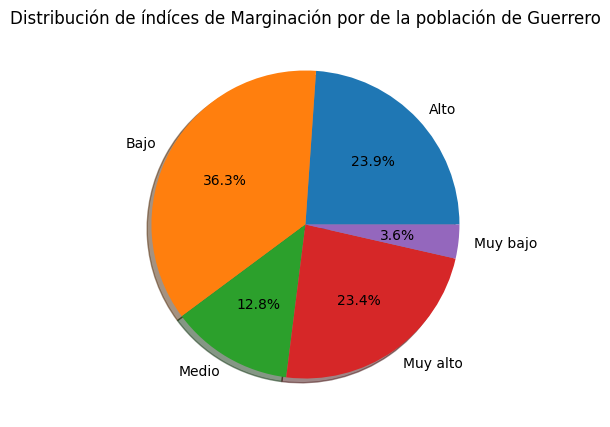

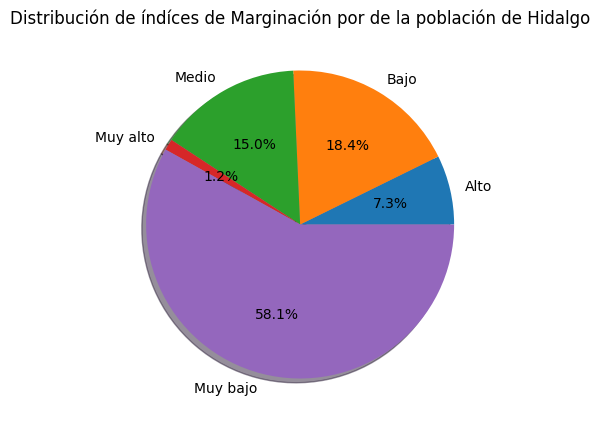

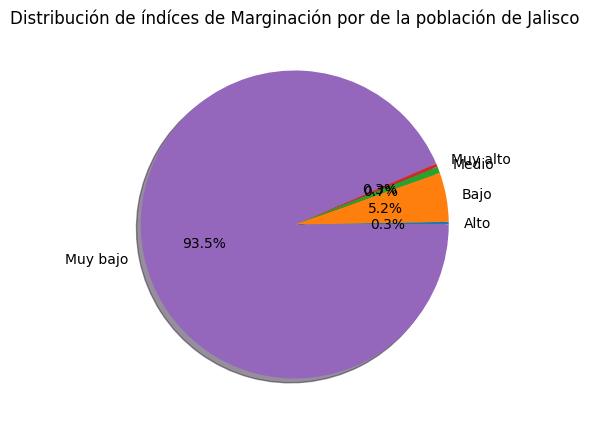

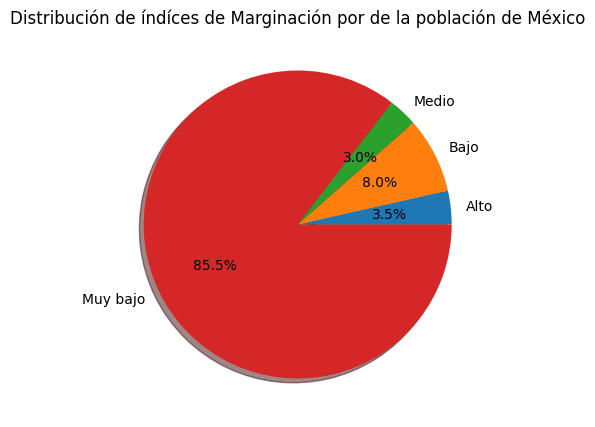

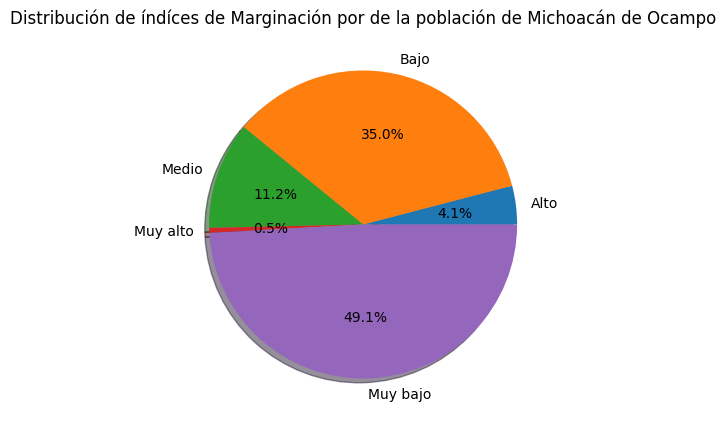

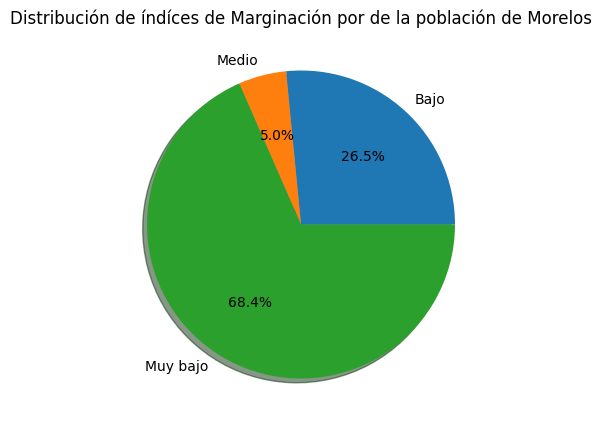

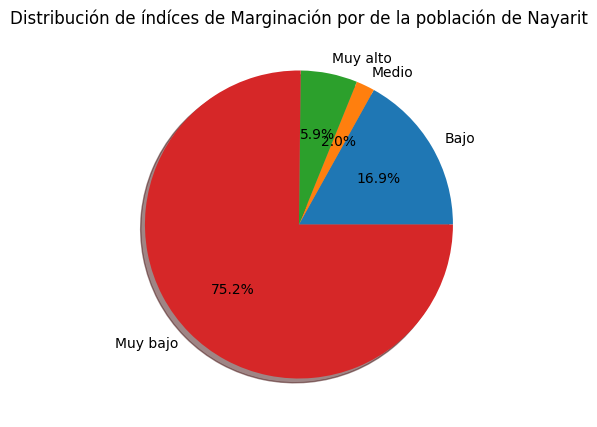

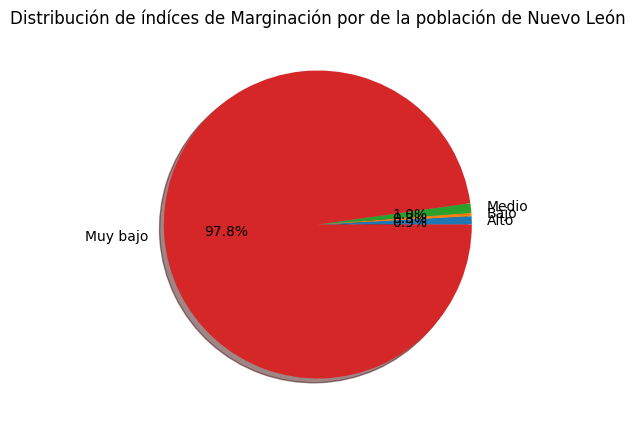

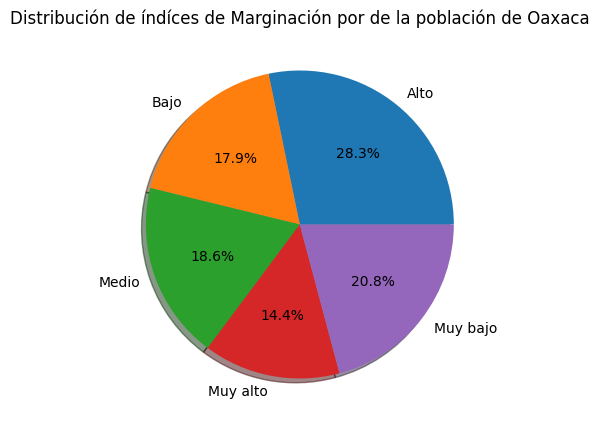

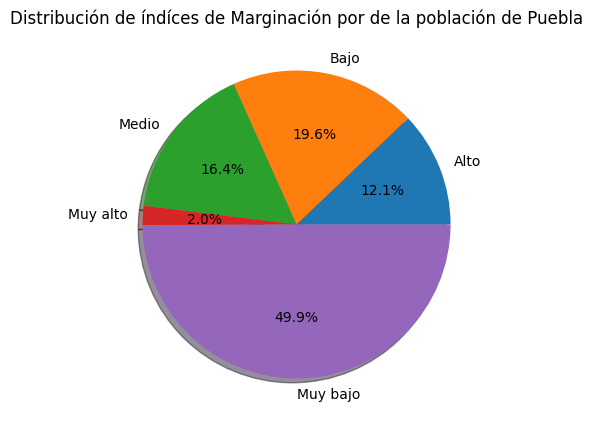

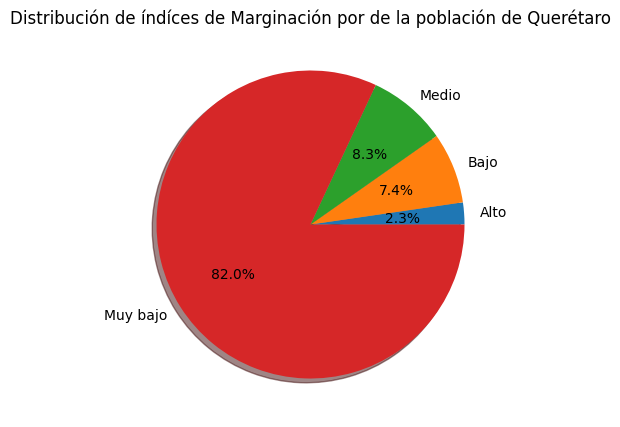

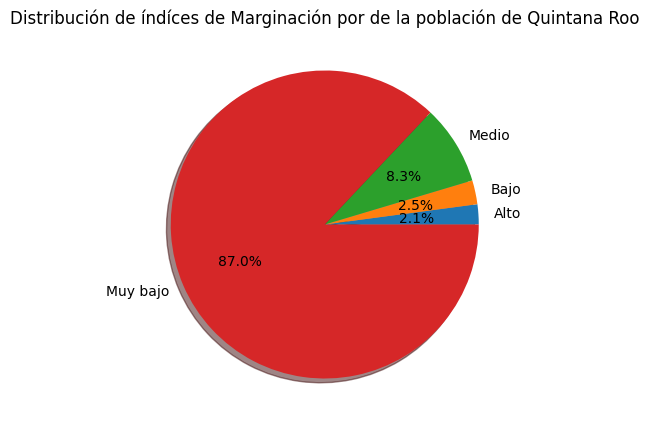

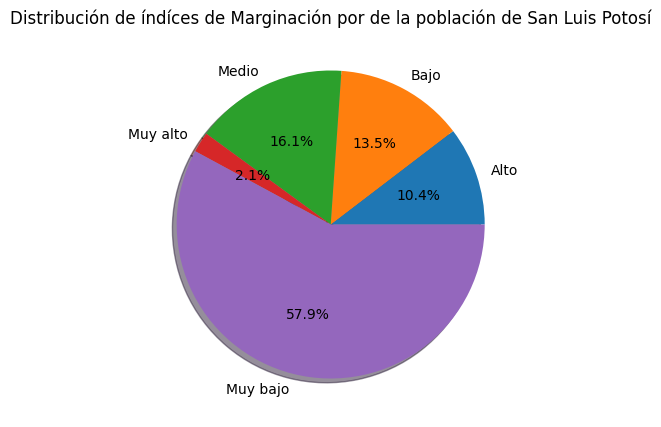

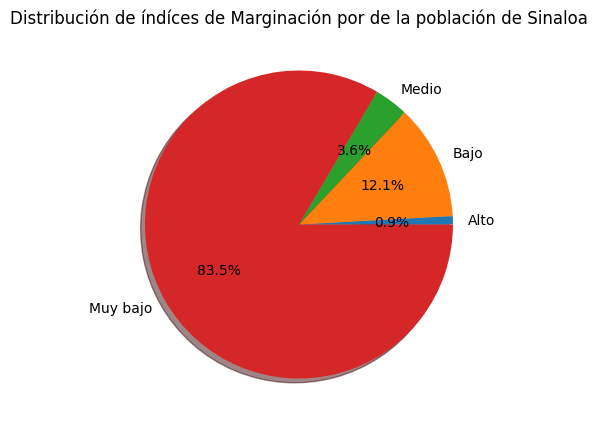

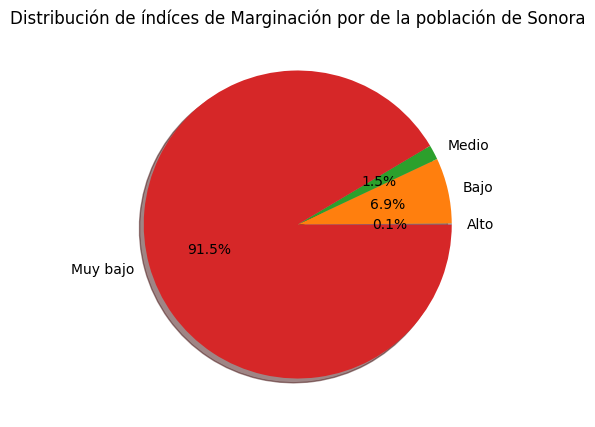

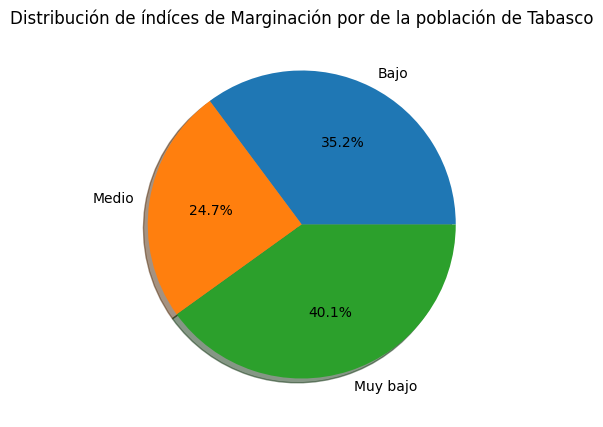

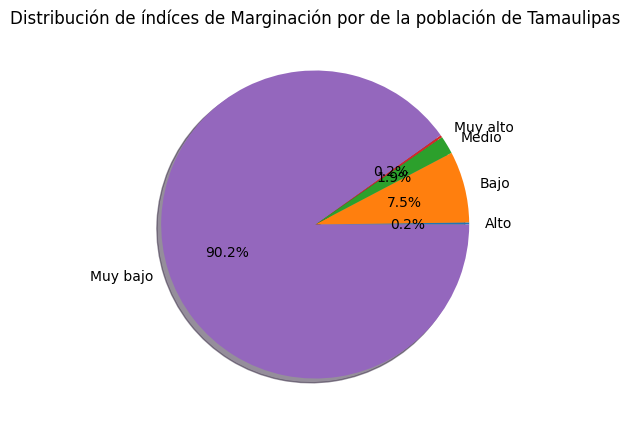

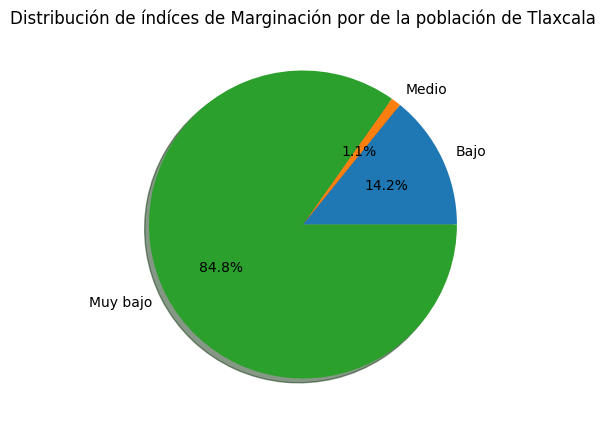

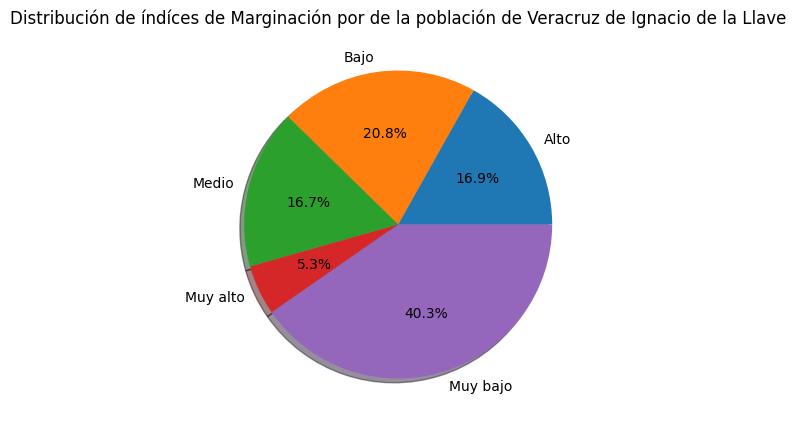

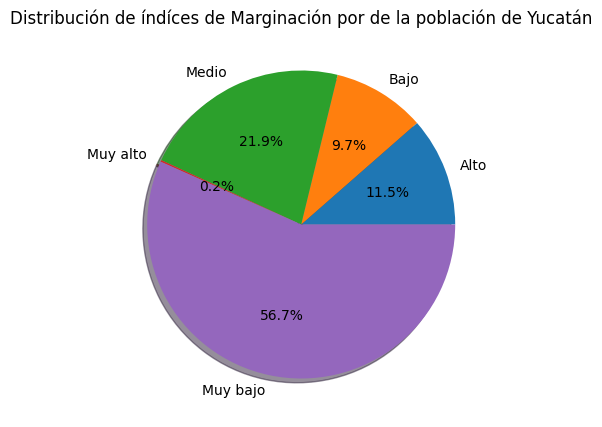

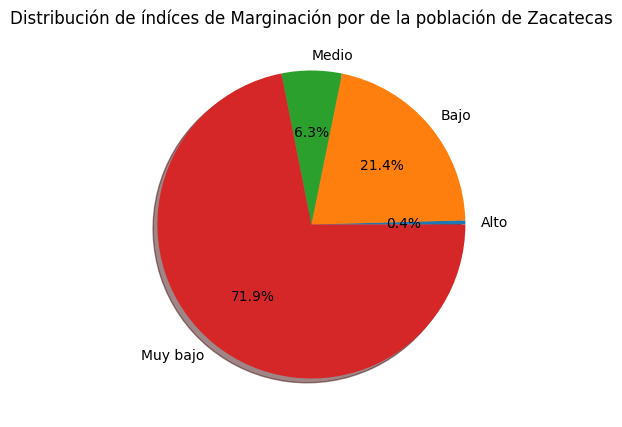

In [283]:
estados = df.NOM_ENT.unique()

for estado in estados:
  titulo="Distribución de índíces de Marginación por de la población de {}".format(estado)
  df_estados_pob = poblacio_estado_indice[estado]
  df_estados_pob.plot.pie(figsize=(5, 5),title =titulo ,ylabel='',autopct='%1.1f%%', \
                   shadow=True, startangle=0)
  
  plt.savefig('distribucion_poblacion_{}.jpg'.format(estado))
  plt.show()